In [ ]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import time
from sklearn.neural_network import MLPClassifier

from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

#Load MNIST dataset 
digits = datasets.load_digits(n_class=10)
# Create our X and y data
X = digits.data
Y = digits.target
print(X.shape, Y.shape)
num_examples = X.shape[0]      ## training set size
nn_input_dim = X.shape[1]

In [72]:
learning_rate=0.01

In [166]:
Y_label=np.array([0,2,0,3,1,2,2,4,2,0]*10)
print (Y_label.shape)
X_training_data= np.random.uniform(1,500,size=(7,100))
c=np.zeros((100,5))
c[np.arange(100),Y_label]=1
#print("test",c)
#print("test",np.transpose(c)[9,:])
c=np.transpose(c)
training_count=X_training_data.shape[1]
#features=X_training_data.shape[0]
print (training_count)
print ("c",c.shape)


print ('Training data size: ',X_training_data.shape) 
#print ('Describe: ',df.describe())
Features=X_training_data.shape[0]
#dict_layers={1:15,2:12,3:10,4:7}

def sigmoid(x,driv=False):
    if driv:
        return x*(1-x)
    return 1/(1 + np.exp(-x))

def softmax(x):
    t=np.exp(x)
    sum1=np.sum(t,axis=0)
    return t/sum1

def weights(neuron,input_features):
    return (np.random.uniform(1,0,size=(neuron,input_features)))

def hypothesis(weights, input_features):
    return np.dot(weights,input_features)

def loss_function(actual_output, network_output):
    #print("loss_function", actual_output.shape, network_output.shape)
    return np.mean(np.sum(-np.multiply(actual_output, np.log(network_output)), axis=0))


#actualop=np.identity(7)

w1=weights(15, Features)
z1=hypothesis(w1, X_training_data)
a1=sigmoid(z1)

w2=weights(12,15)
z2=hypothesis(w2,a1)
a2=sigmoid(z2)

w3=weights(10,12)
z3=hypothesis(w3,a2)
a3=sigmoid(z3)

w4=weights(5,10)
z4=hypothesis(w4,a3)
a4=sigmoid(z4)
#print ("a4 staring:",a4)

(100,)
100
c (5, 100)
Training data size:  (7, 100)


In [124]:
aa = np.ones((3, 2))
sigmoid(aa)

array([[ 0.73105858,  0.73105858],
       [ 0.73105858,  0.73105858],
       [ 0.73105858,  0.73105858]])

In [125]:
print("X", X_training_data.shape, "w1", w1.shape, "z1", z1.shape, a1.shape, "w2", w2.shape, z2.shape, a2.shape, w3.shape, w4.shape, a4.shape)

X (7, 100) w1 (15, 7) z1 (15, 100) (15, 100) w2 (12, 15) (12, 100) (12, 100) (10, 12) (5, 10) (5, 100)


In [ ]:

l = []
for i in range(1000):

    loss = loss_function(c, a4)#need to chnage as need to take log accroding to actualop
    if i%100==0:
        print ("loss:", loss)
        l.append(loss)
  
    x4 = np.multiply(-c, 1-a4)
    w4 -= learning_rate*(np.dot(x4, np.transpose(a3)))
    x3 = np.multiply(np.multiply(np.dot(np.transpose(w4), x4),a3), (1-a3))
#     print (x.shape)
#     print ('w3',w3.shape)
#     print ('next1',np.multiply(x,(1-a3)).shape)
#     print ('next2',np.dot(np.multiply(x,(1-a3)),np.transpose(a2)).shape)
    w3-= learning_rate * (np.dot(x3, np.transpose(a2)))
#     print ('x2:',x2.shape)
#     print ('next3',np.multiply(x2, (1-a2)).shape)
#     print ('a1',a1.shape)
#     print ('next4',np.dot(np.multiply(x2, (1-a2)), np.transpose(a1)).shape)
    x2 = np.multiply(np.multiply(np.dot(np.transpose(w3), x3), a2), (1-a2))
    w2 -= learning_rate * (np.dot(x2, np.transpose(a1)))
    x1 = np.multiply(np.multiply(np.dot(np.transpose(w2), x2), a1), (1-a1))
    w1 -= learning_rate * (np.dot(x1, np.transpose(X_training_data)))

    z1=hypothesis(w1, X_training_data)
    a1=sigmoid(z1)
    
    z2=hypothesis(w2,a1)
    a2=sigmoid(z2)
    
    z3=hypothesis(w3,a2)
    a3=sigmoid(z3)
    
    z4=hypothesis(w4,a3)
    a4=sigmoid(z4)
    #print ('a4',a4)
    
print("X", X_training_data.shape, "w1", w1.shape, "z1", z1.shape, a1.shape, "w2", w2.shape, z2.shape, a2.shape, w3.shape, w4.shape, a4.shape)

<IPython.core.display.Javascript object>


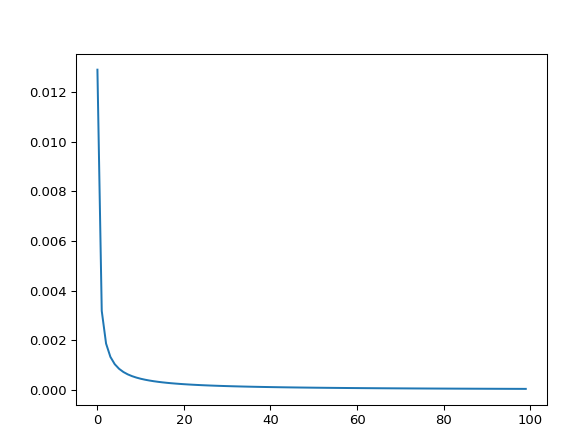

In [168]:
plt.plot(l)

In [154]:
a=np.array([93,28,64,-49,-1,0,-.01])

z1=hypothesis(w1,a)
a1=sigmoid(z1)


z2=hypothesis(w2,a1)
a2=sigmoid(z2)


z3=hypothesis(w3,a2)
a3=sigmoid(z3)

z4=hypothesis(w4,a3)
a4=sigmoid(z4)
print ("a4:", a4.shape, a4)


a4: (5,) [ 0.99968555  0.9992162   0.99975832  0.99906489  0.99908577]


In [156]:
np.max(a4)
print (softmax(a4))
np.max(softmax(a4))

[ 0.20006468  0.1999708   0.20007924  0.19994055  0.19994472]


0.20007924112871445

In [20]:
np.max(np.abs(loss),axis=0)

array([ 0.00239577,  0.00435567,  0.00239577,  0.002563  ,  0.00140139,
        0.00889528,  0.02174121,  0.01768743,  0.00435567,  0.00889528,
        0.00239577,  0.00435567,  0.00239577,  0.002563  ,  0.00140139,
        0.00889528,  0.02174121,  0.01768743,  0.00435567,  0.00889528,
        0.00239577,  0.00435567,  0.00239577,  0.002563  ,  0.00140139,
        0.00889528,  0.02174121,  0.01768743,  0.00435567,  0.00889528,
        0.00239577,  0.00435567,  0.00239577,  0.002563  ,  0.00140139,
        0.00889528,  0.02174121,  0.01768743,  0.00435567,  0.00889528,
        0.00239577,  0.00435567,  0.00239577,  0.002563  ,  0.00140139,
        0.00889528,  0.02174121,  0.01768743,  0.00435567,  0.00889528,
        0.00239577,  0.00435567,  0.00239577,  0.002563  ,  0.00140139,
        0.00889528,  0.02174121,  0.01768743,  0.00435567,  0.00889528,
        0.00239577,  0.00435567,  0.00239577,  0.002563  ,  0.00140139,
        0.00889528,  0.02174121,  0.01768743,  0.00435567,  0.00

In [147]:
clf = MLPClassifier(solver='lbfgs', alpha=.001,hidden_layer_sizes=(15,12,10,5), random_state=7)

In [148]:
clf.fit(np.transpose(X_training_data),Y_label) 

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 12, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [149]:
clf.predict([1,2,3,1,44,56,0])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [48]:
 clf.coefs_[4]

array([[-0.49736791,  0.1487935 , -0.21557682, -0.63919311,  0.61781721,
         0.59057702,  0.05271224],
       [ 0.15490559,  0.22109446,  0.55844894, -0.0425395 ,  0.10846547,
        -0.35816102, -0.337267  ],
       [ 0.03604182, -0.35424777, -0.61362331, -0.16949914,  0.32382499,
        -0.28947987,  0.46432841],
       [ 0.19558172,  0.17690665,  0.78146792, -0.54066561, -0.40038125,
         0.54786955,  0.30913129],
       [-0.53436402,  0.34052191, -0.62965788, -0.47119129, -0.50195235,
        -0.27148048, -0.16390917],
       [ 0.52979182, -0.05842897, -0.49056998, -0.29936985, -0.6483247 ,
        -0.61988915, -0.10350749],
       [-0.02973576, -0.29618334, -0.14584315, -0.50120546,  0.19079085,
        -0.158501  , -0.42309177]])

In [33]:
print (w1)

[[ 0.65466698  0.35701642  0.55818267  0.38126314  0.00648179  0.15563746
   0.23392194]
 [ 0.12820488  0.2939174   0.42995415  0.42233099  0.84353022  0.49240991
   0.40482941]
 [ 0.50467047  0.69791721  0.42649097  0.67964935  0.34452893  0.81975422
   0.7348324 ]
 [ 0.78442141  0.69292531  0.40989607  0.18746679  0.77769751  0.90745974
   0.76239234]
 [ 0.90493176  0.24035792  0.0385406   0.3192511   0.54767811  0.40872856
   0.59314764]
 [ 0.25478342  0.56764022  0.50119855  0.09089578  0.2987599   0.01085181
   0.5662818 ]
 [ 0.22540292  0.37393451  0.06431835  0.10118819  0.06637158  0.74812588
   0.6363618 ]
 [ 0.96504323  0.64822604  0.15534912  0.79593791  0.77746707  0.97491256
   0.02140137]
 [ 0.214471    0.67635892  0.28722271  0.78335519  0.78285491  0.76273112
   0.11331966]
 [ 0.31914941  0.85745682  0.50090556  0.96998913  0.1615505   0.18282105
   0.29883626]
 [ 0.88381896  0.97872808  0.34236136  0.95140639  0.04095962  0.85923959
   0.33408313]
 [ 0.06853157  0.5455

In [11]:
print (Y_label[:2])
print (c[:,:2])

[0 2]
[[ 1.  0.]
 [ 0.  0.]
 [ 0.  1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
